<h1>ejercicios de inteligencia artificial</h1>
<h2>Proyecto 1: Convertir Celsius a fahrenheit</h2>

<p>en este proyecto, construiremos un simple modelo de aprendizaje de amquinas para convertir las temperaturas de Celsius a Fahrenheit</p>

la ecuacion es la sigueente:

<h2>T(F) = T(C) * 9/5 + 32</h2>

por ejemplo, convertamos la temepratura de 0 grados Celsius en Fahrenheit

<h2>T(F) = 0 * 9/5 + 32 = 32</h2>

<p>el obejtivo es predecir el valor de una variable y en base a otra variable x;</p>
<p>x se llama la variable independiente e Y  se llama la variable dependiente</p>
<p>esto se llama "Regresion" y ese tratara con mucho mas detalle en secciones posteriores del curso</p>

In [2]:
import tensorflow  as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [17]:
temperature_df = pd.read_csv("data/training.csv")
serie_celsius = temperature_df.Celsius
serie_fahrenheit = temperature_df.Fahrenheit
print(serie_celsius.describe())
print("\n")
2print(serie_fahrenheit.describe())

count    16000.000000
mean      1254.736062
std        726.338268
min          0.000000
25%        627.750000
50%       1265.000000
75%       1891.000000
max       2500.000000
Name: Celsius, dtype: float64


count    16000.000000
mean      2290.524913
std       1307.408882
min         32.000000
25%       1161.950000
50%       2309.000000
75%       3435.800000
max       4532.000000
Name: Fahrenheit, dtype: float64


<h2>VISUALIZAR LOS DATOS</h2>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Celsius', ylabel='Fahrenheit'>

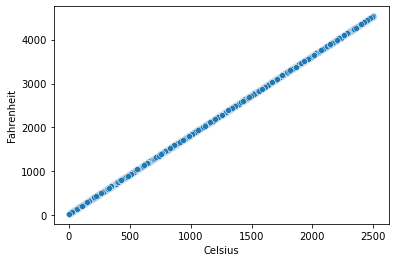

In [18]:
sns.scatterplot(serie_celsius,serie_fahrenheit)

observamos que existe una relacion lineal entre las variables. comprobar